<a href="https://colab.research.google.com/github/manabil/Applied_Machine_Learning/blob/main/6-%20Deployment/Rice%20Type%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Nama : Muhammad Ammar Nabil<br>
Kelas : M03<br>
Email : mammarnabil1@gmail.com


# **Rice Classification**
---

This model build for classify rice. This model can classify 5 type of rice:
 * Arborio Rice
 * Basmati Rice
 * Ipsala Rice
 * Jasmine Rice
 * Karacadag Rice

> Dataset [Rice Image Dataset](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset?select=Rice_Image_Dataset) by Murat Koklu. Total of image 75000 image, consist of:
 * Arborio Rice : 15000 image
 * Basmati Rice : 15000 image
 * Ipsala Rice : 15000 image
 * Jasmine Rice : 15000 image
 * Karacadag Rice : 15000 image

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab import files, drive
from keras import layers, callbacks
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

## Preparing Data

In [ ]:
# Download kaggle.json API
!mkdir ~/.kaggle
files.upload()
!mv kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json


In [ ]:
# Change permission
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle/ -la

total 16
drwxr-xr-x 2 root root 4096 Sep  6 06:49 .
drwx------ 1 root root 4096 Sep  6 06:49 ..
-rw------- 1 root root   63 Sep  6 06:49 kaggle.json


In [ ]:
# Download and extract kaggle dataset
!kaggle datasets download -d muratkokludataset/rice-image-dataset
!unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

## Preprocessing Data

In [ ]:
# Check distribution of data
base_path = 'Rice_Image_Dataset/'
class_names = sorted(os.listdir(base_path))[:-1]
sizes = [len(os.listdir(base_path + name)) for name in class_names]
for name, data in zip(class_names, sizes):
    print(name , ' : ' , data, 'images')

Arborio  :  15000 images
Basmati  :  15000 images
Ipsala  :  15000 images
Jasmine  :  15000 images
Karacadag  :  15000 images


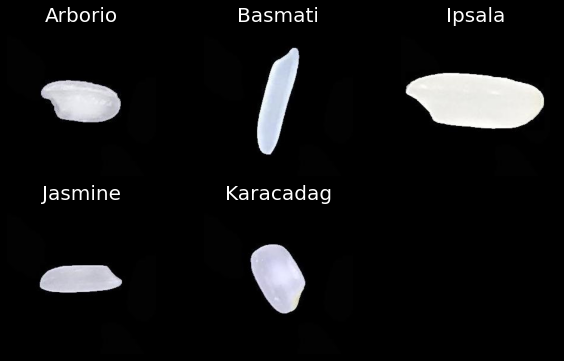

In [ ]:
# Comparision Rice Grain
img1 = mpimg.imread(f'{base_path}Arborio/Arborio (1).jpg')
img2 = mpimg.imread(f'{base_path}Basmati/Basmati (1).jpg')
img3 = mpimg.imread(f'{base_path}Ipsala/Ipsala (1).jpg')
img4 = mpimg.imread(f'{base_path}Jasmine/Jasmine (1).jpg')
img5 = mpimg.imread(f'{base_path}Karacadag/Karacadag (1).jpg')

plt.style.use('dark_background')

fig, axs = plt.subplots(2, 3, figsize=(10,6))
# Axis 0,0
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Arborio', size=20)
# Axis 0,1
axs[0, 1].imshow(img2)
axs[0, 1].set_title('Basmati', size=20)
# Axis 0,2
axs[0, 2].imshow(img3)
axs[0, 2].set_title('Ipsala', size=20)
# Axis 1,0
axs[1, 0].imshow(img4)
axs[1, 0].set_title('Jasmine', size=20)
# Axis 1,1
axs[1, 1].imshow(img5)
axs[1, 1].set_title('Karacadag', size=20)
# Hide x labels and tick labels
for ax in axs.flat:
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.axis('off')

In [ ]:
# Create Generator
generator = ImageDataGenerator(rescale=1./255,
                               rotation_range=20,
                               validation_split=0.2)

In [ ]:
# Apply Generator
train_set = generator.flow_from_directory(base_path, 
                                          (150, 150), 
                                          seed=2)

val_set = generator.flow_from_directory(base_path,
                                        (150, 150),
                                        seed=2,
                                        subset='validation')

Found 75000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


## Create Model

In [ ]:
# Create Model
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(512, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(1024, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(5, activation='softmax')
    ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# Create Callback
class AccCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAccuracy and Val Accuracy above 92%")
      self.model.stop_training = True

Acc_callbacks = AccCallback()

callback = [
    callbacks.ModelCheckpoint('BestModel.h5', save_best_only=True, 
                              monitor='val_accuracy', 
                              mode='max'),
    Acc_callbacks
    ]

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train Model

In [ ]:
# Test GPU Avaibility
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
%%time
# Train Model
with tf.device("/device:GPU:0"):
    history = model.fit(
        train_set,
        epochs=15,
        validation_data=val_set,
        callbacks=callback,
        steps_per_epoch=30,
    )

Epoch 1/15
30/30 [==============================] - 118s 4s/step - loss: 1.3038 - accuracy: 0.4094 - val_loss: 0.7706 - val_accuracy: 0.6031
Epoch 2/15
30/30 [==============================] - 89s 3s/step - loss: 0.4861 - accuracy: 0.7948 - val_loss: 0.2295 - val_accuracy: 0.9263
Epoch 3/15
30/30 [==============================] - 91s 3s/step - loss: 0.3840 - accuracy: 0.8354 - val_loss: 0.4693 - val_accuracy: 0.7889
Epoch 4/15
30/30 [==============================] - 88s 3s/step - loss: 0.2757 - accuracy: 0.8958 - val_loss: 0.2689 - val_accuracy: 0.9057
Epoch 5/15
30/30 [==============================] - 89s 3s/step - loss: 0.2583 - accuracy: 0.9094 - val_loss: 0.1639 - val_accuracy: 0.9391
Epoch 6/15
30/30 [==============================] - ETA: 0s - loss: 0.2014 - accuracy: 0.9281
Accuracy and Val Accuracy above 92%
30/30 [==============================] - 88s 3s/step - loss: 0.2014 - accuracy: 0.9281 - val_loss: 0.1921 - val_accuracy: 0.9303
CPU times: user 9min 30s, sys: 9.7 s, to

## Visualize Model Training

In [ ]:
# Make plot function
def printPlot(label: list, title: str, legend: list, *line: str):
    '''
    Print plot of history
    * label[0]  = x_label
    * label[1]  = y_label
    * label[n]  = n_label
    * line[n]   = line_n
    * legend[n]  = [location, line_n, ...]
    '''
    plt.style.use('dark_background')

    plt.title(title)
    plt.plot(history.history[line[0]], '#1f77b4')
    plt.plot(history.history[line[1]], '#ff7f0e')
    plt.xlabel(label[0])
    plt.ylabel(label[1])
    plt.legend(legend[1:], loc=legend[0])
    plt.show()

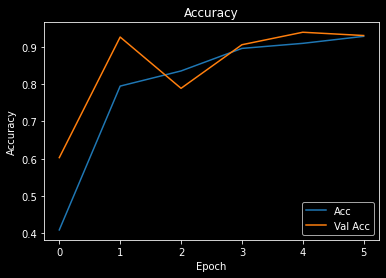

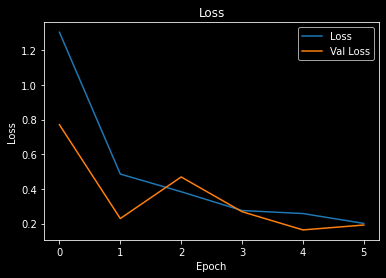

In [ ]:
# Print Plot
printPlot(['Epoch', 'Accuracy'], 'Accuracy', 
          ['lower right', 'Acc', 'Val Acc'],
          'accuracy', 'val_accuracy')
printPlot(['Epoch', 'Loss'], 'Loss', 
          ['upper right', 'Loss', 'Val Loss'],
          'loss', 'val_loss')

## 5. Testing Model

In [ ]:
# Make Predict Function
def predictRice():
    uploaded = files.upload()

    for fn in uploaded.keys():
        path = fn
        img = image.load_img(path, target_size=(150,150))

        imgplot = plt.imshow(img)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])

        classes = model.predict(images, batch_size=10)  
        print(fn)
        if classes[0][0]==1:
            print('\nThis is Arborio Rice')
        elif classes[0][1]==1:
            print('\nThis is Basmati Rice')
        elif classes[0][2]==1:
            print('\nThis is Ipsala Rice')
        elif classes[0][3]==1:
            print('\nThis is Jasmine Rice')
        elif classes[0][4]==1:
            print('\nThis is Karacadag Rice')

Saving test9.png to test9 (1).png
test9.png

This is Basmati Rice


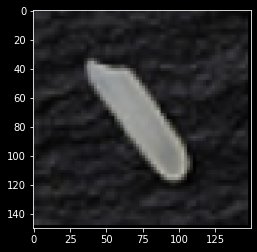

In [ ]:
# Predict an Image
predictRice()

We will use this image for test the model. Before we test the model, we must choose a grain and crop it for the model.

<center>

![dasd](https://media.istockphoto.com/photos/basmati-rice-picture-id1324287396?b=1&k=6&m=1324287396&s=170667a&w=0&h=IB0al7NntpQVsmcJWIviurlPq0IEOFMlAjqAQxk2mcI=)

**Basmati Rice**

Source : [freejpg.com](https://en.freejpg.com.ar/stockphotos/premium/1324287396/basmati-rice)

## Saving Model

In [ ]:
# Mount Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save Model in HDF5 Type
!cp BestModel.h5 drive/MyDrive/Saved_Model/


# Save Model in SavedMode Type
drive_path = 'drive/MyDrive/Saved_Model/SavedMode/'
tf.saved_model.save(model, drive_path)

In [ ]:
# Convert Model in TFLite
converter = tf.lite.TFLiteConverter.from_saved_model('drive/MyDrive/Saved_Model/SavedMode/')
tflite_model = converter.convert()
    
with tf.io.gfile.GFile('rice_class.tflite', 'wb') as f:
    f.write(tflite_model)

In [ ]:
# Copy TFLite model in drive
!cp rice_class.tflite drive/MyDrive/Saved_Model/